# Real Robot Lab: Mapping and Navigation

Welcome to the ROSject created in order for you to be able to get started with autonomous navigation in our Real Robot Lab, where you can control a real TurtleBot3. 

### Connect to Real Robot
First, we'll connect to the actual TurtleBot3 in the Real Robot Lab. Make sure you setup the connection by following the instructions in the link below, 'How to use Real Robot Connection in ROS Developement Studio': 

https://www.theconstructsim.com/use-real-robot-connection-rosdevelopementstudio/

Once this is done, you can check in the 'Real Robot' dropdown menu on the top left side of your screen if you are connected to the robot:

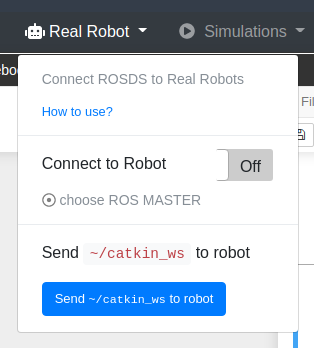

To double check that everything is running smoothly, a good idea is to see if there are any roscores or nodes running in the background. Open up a new shell by clicking on the 'Tools' dropdown menu on the top left side of your screen:

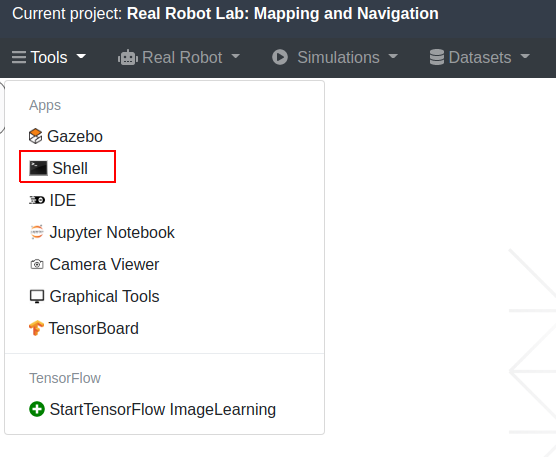

Inside the terminal, run the following command to start a roscore:

In [ ]:
roscore

and in a new shell:

In [ ]:
rosnode list

you should see a list of the running nodes. If the motor controllers are on, you'll see something like this:

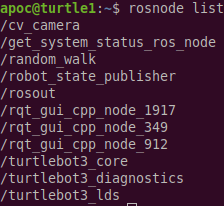

and if only the roscore is running, you'll only see the /rosout node. If you see this, we're good to go and start mapping.

### Working with Simulation
In order to work with the Real Robot Lab Gazebo simulation when you're not connected to the real robot, launch the simulation with the following command:

In [ ]:
roslaunch realrobotlab main.launch

This command launches a simulated Real Robot Lab including the TurtleBot3 and the obstacles within the lab.

## Mapping with Real Robot
The first step to be able to autonomously navigate is to create a map of the environment. Let's make sure that the controllers are shutdown so we can start from scratch. This is useful in order to avoid redundancies in launching nodes that are already launched. Open up a new shell and run the following command:

In [ ]:
kill controllers.sh ADD

Now we can go ahead and start mapping. In a new shell, run

In [ ]:
roscore

and in another one, launch the basic packages that start the motor controllers and the sensors:

In [ ]:
roslaunch turtlebot3_bringup turtlebot3_robot.launch

You can make sure that the topics are available by running

In [ ]:
rostopic list

Now that the bases are running, launch the SLAM (Simultaneous Localization and Mapping) node. First, specify the TurtleBot3 model by running

In [ ]:
export TURTLEBOT3_MODEL=burger

and launch the node with

In [ ]:
roslaunch turtlebot3_slam turtlebot3_slam.launch slam_methods:=gmapping

This node is using the gmapping node to build the map, and it also starts RViz. To see this, click on the 'Graphical Tools' button under the Tools dropdown menu on the left side of your screen.

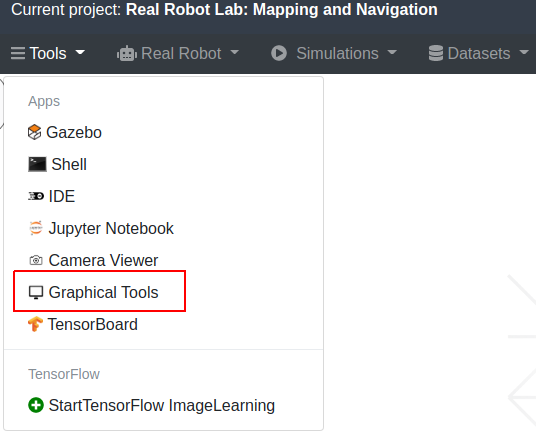

You should see something like this in the window that opens up:

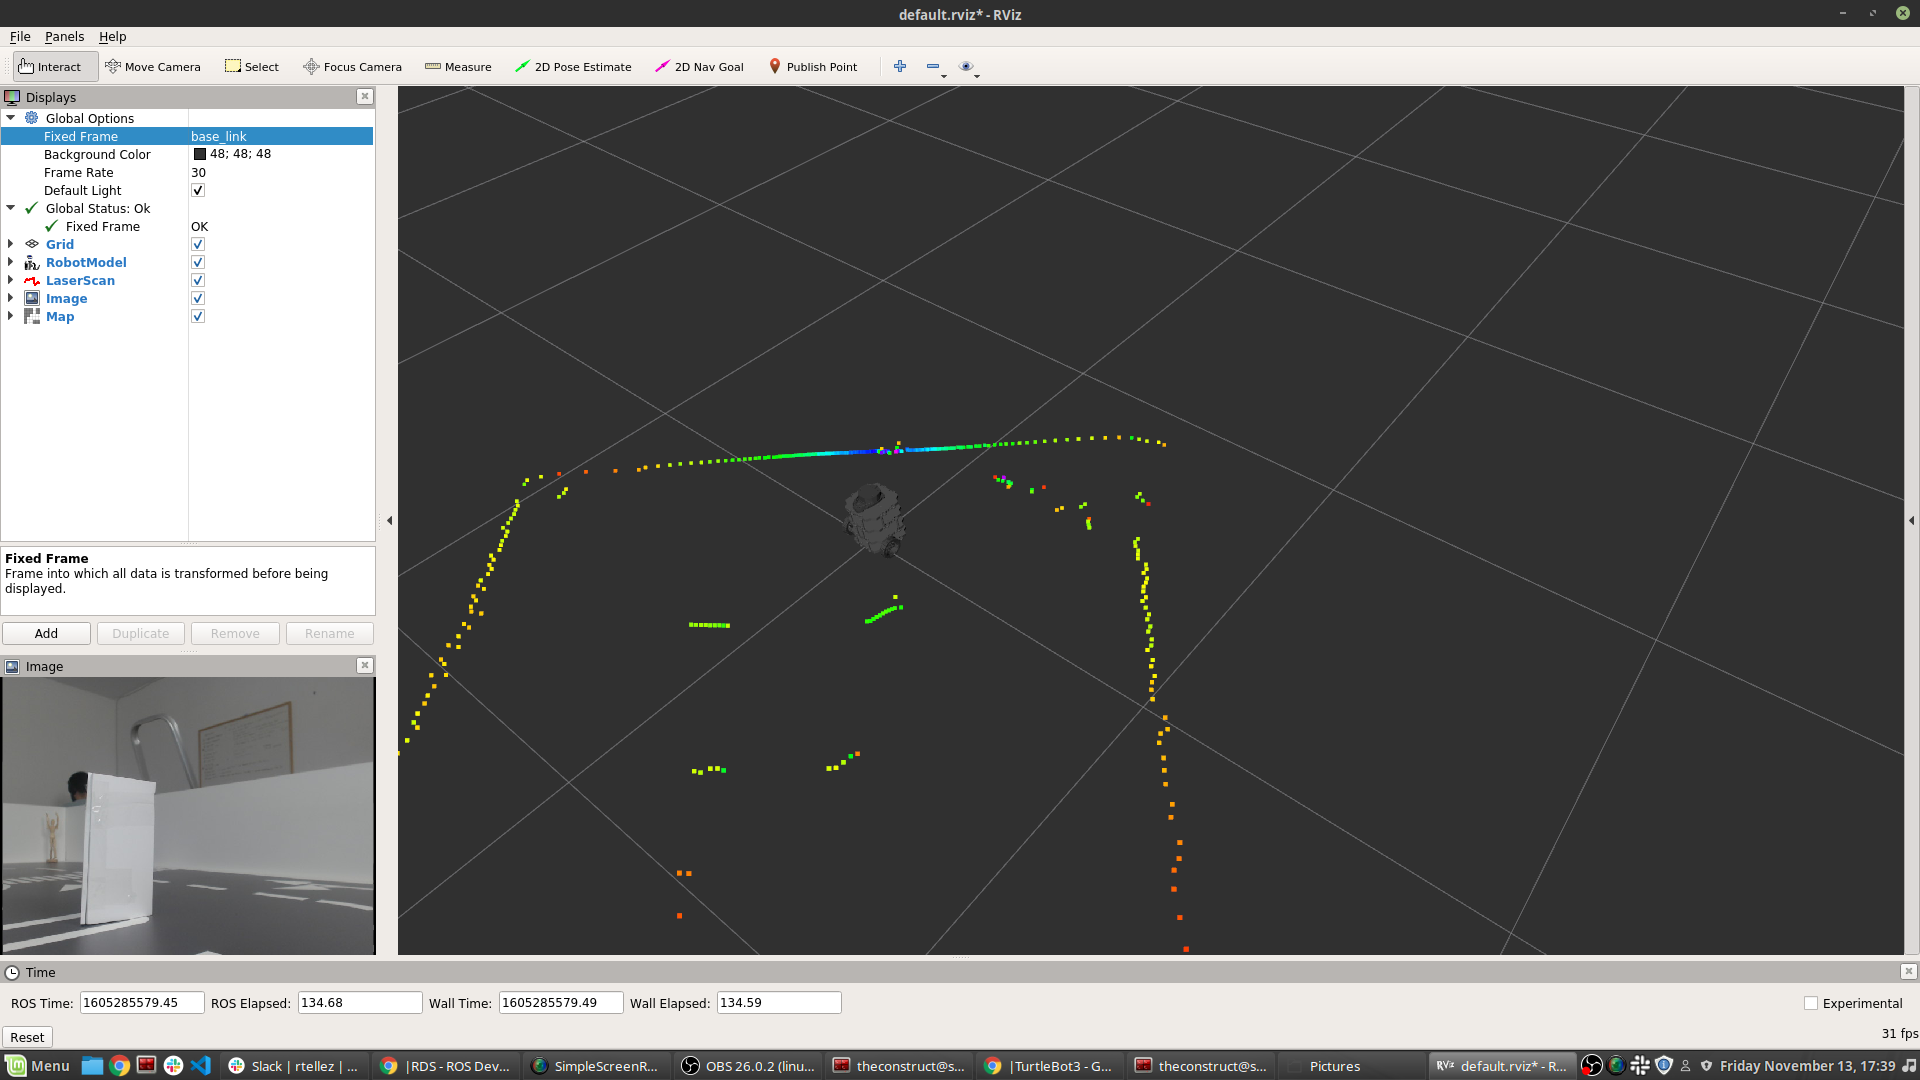

As you can see, the laser scan and camera are already available and visible for you to start using them however you want. The topics in question are /scan and /cv_camera/image_raw. You'll also see a Map dropdown menu on the left side of the screen, which is incomplete now because we have to move the robot around in order to explore the environment and put it in the /map topic.

Try adding the /map topic in RViz and you'll see the incomplete map. Go to Graphical Tools, and click on the 'Add' button on the lower left side of the window:

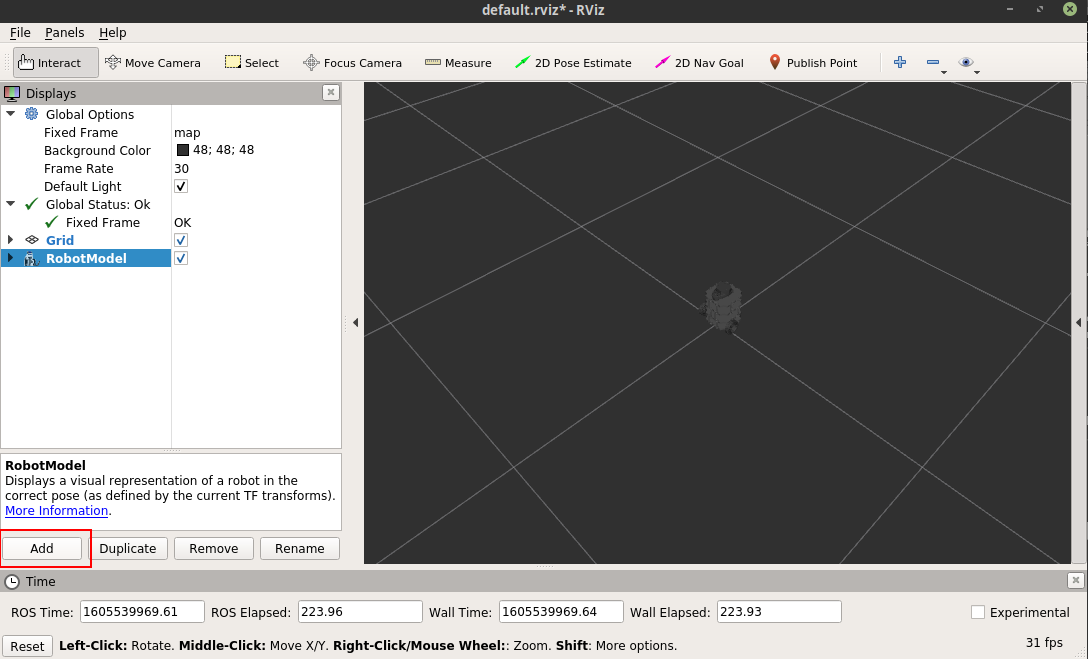

and select the 'By topic' tab and select the Map topic:

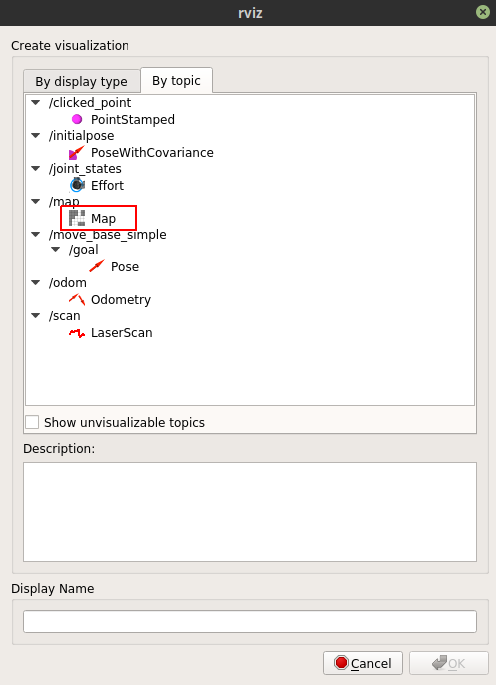

You'll see something incomplete, like this:

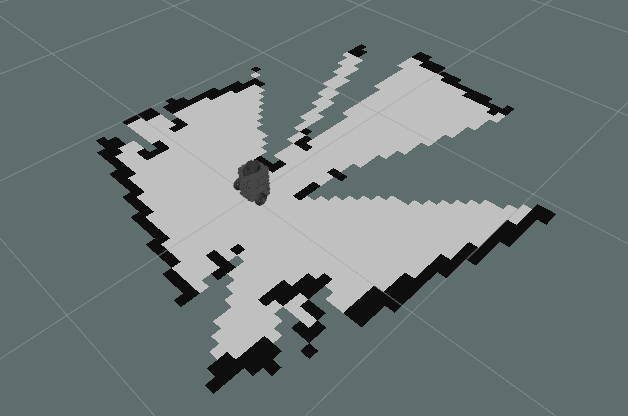

This is because of the obstacles in the way, we'll have to move around them to finish this map.


## Mapping with Simulation

To map inside the Real Robot Lab simulation, make sure the simulation is running with

In [ ]:
roslaunch realrobotlab main.launch

and run the following commands in a new shell:

In [ ]:
export TURTLEBOT3_MODEL=burger

In [ ]:
roslaunch turtlebot3_slam turtlebot3_slam.launch slam_methods:=gmapping

You can then run the teleop node in a new shell and move the TurtleBot3 simulation the same way you would do with the real one. This is described in the following section, Build Map.

## Build Map

There are two easy ways that you can build the map. The first one is to use your keyboard to move the TurtleBot3 around. To do this, open up a new shell and specify the robot model again. You'll have to do this in every new shell you open. Then you can run the teleoperation node:

In [ ]:
export TURTLEBOT3_MODEL=burger

In [ ]:
roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch

you'll see in the shell that you can move the robot with the following keys. **Remember to not go too fast! Please take care of the robot and help us out so the next person can use it with no problems.** If you're working with the simulation go as fast as you want! That's the beauty of Gazebo.

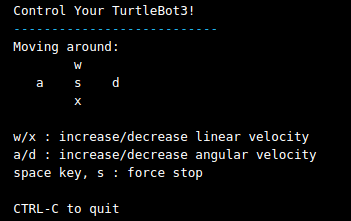

As you move around, you'll start to see the map creation in RViz. This will be quickly since the environment of the Real Robot Lab is relatively small. Move around until the map is complete and at the end you should see something like this:

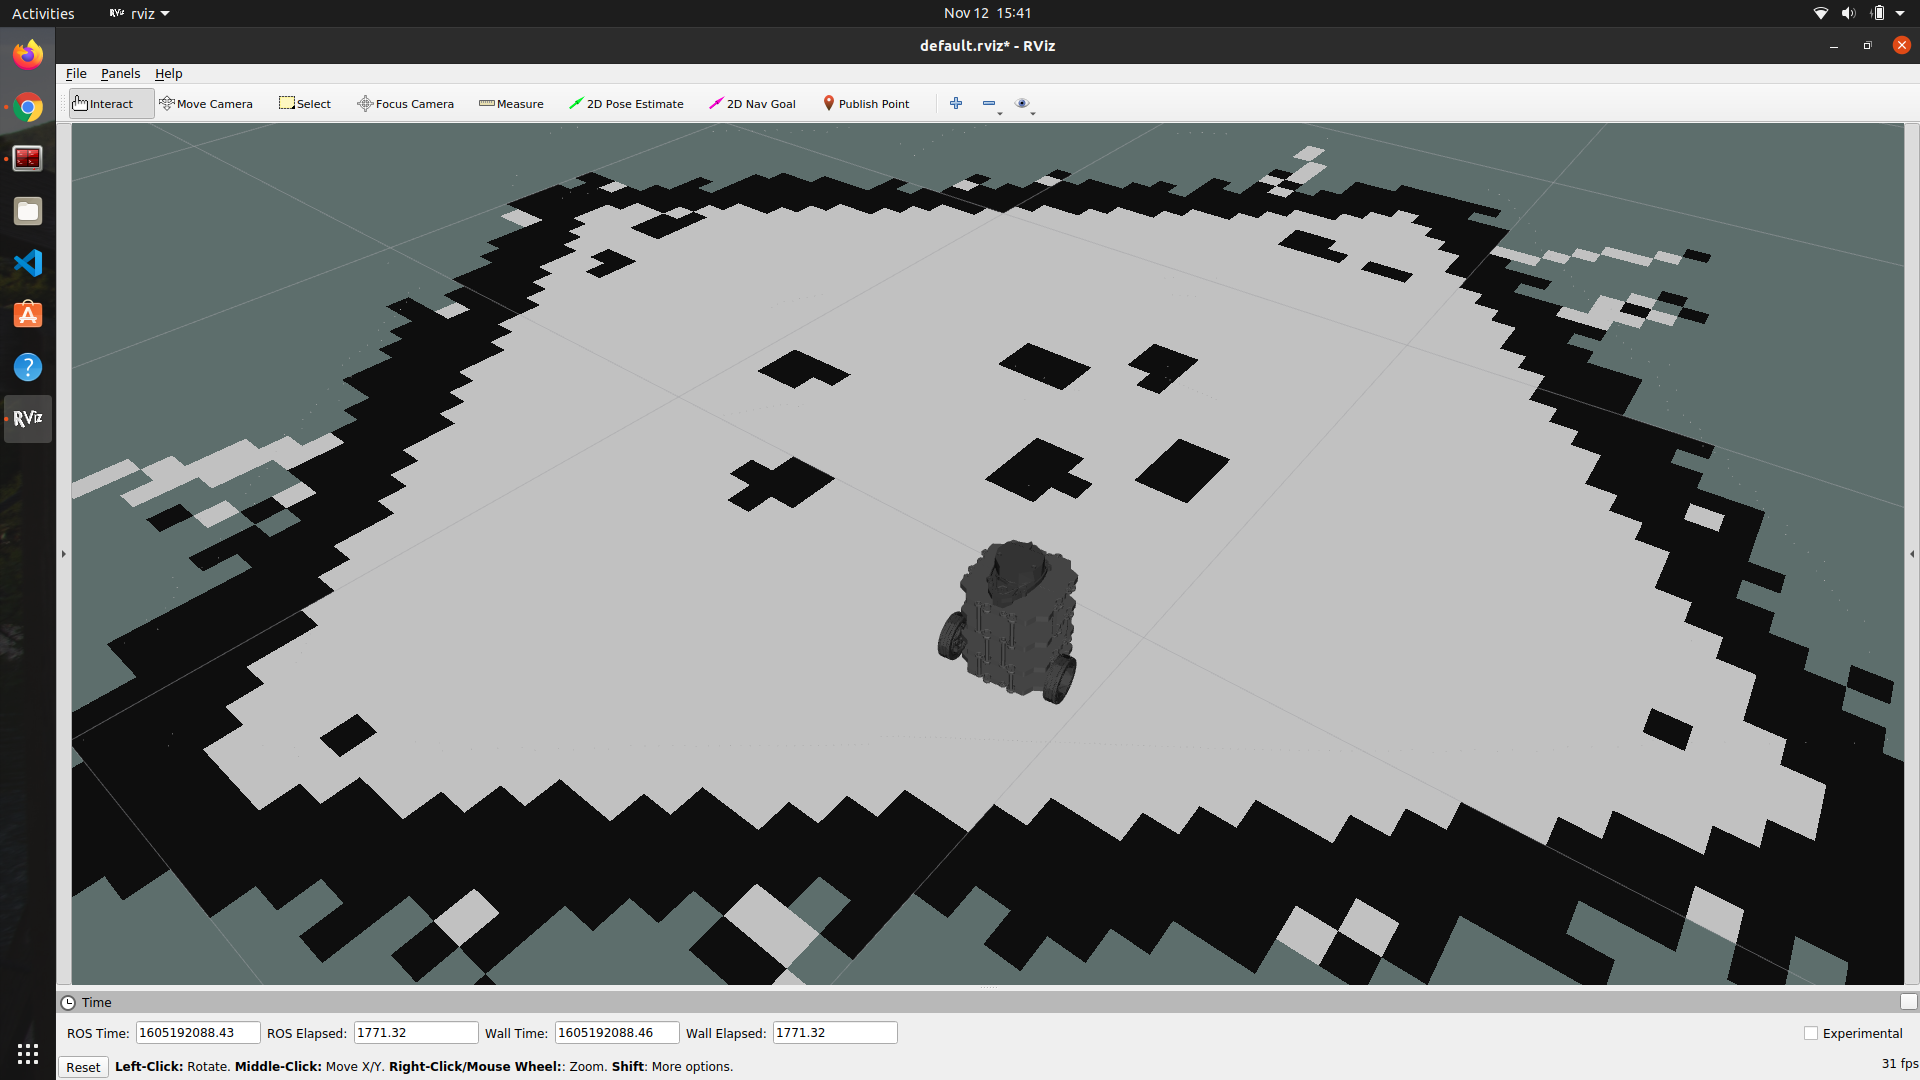

#### random_move
The second way to build the map allows you to work on other things while this is being done. If you've already built the map, you can skip to the Save Map section. To do this, we'll launch the node /random_walk, which makes the TurtleBot3 move around forever while avoiding obstacles. In a new shell, run the command

In [ ]:
roslaunch random_move_python start.launch

You'll see the robot moving around and avoiding obstacles and the walls. Wait a second until the map is complete in RViz and then we're ready to save the map.

### Save Map
We will need the map we've just created in order to use it to navigate autonomously, so we have to save it. The node map_saver is used to do this. In a new shell, run

In [ ]:
rosrun map_server map_saver -f ~/map

This will save the current map in two files, map.pgm and map.yaml in the home folder. We'll use map.yaml in navigation. And that's it! now we're ready to send navigation goals to our TurtleBot3

## Navigation with Real Robot

With the map created, the navigation packages can now be launched in order to send navigation goals to the TurtleBot3 within the Real Robot Lab. The robot will use the wheel encoder, IMU and laser scan to navigate.

TurtleBot3 uses the package move_base to perform navigation. This package provides an implementation of an action that will try to raech a given goal in the robot's known world by combining two planners, one local and one global. 

To launch it, let's restart our controllers to avoid errors. Open up a new shell and run the script

In [ ]:
kill controllers.sh ADD

and in a new shell, run roscore

In [ ]:
roscore

and run the basic packages to get the TurtleBot3 up and running (the same package we launched during mapping):

In [ ]:
roslaunch turtlebot3_bringup turtlebot3_robot.launch

In a new shell, let's specify the TurtleBot3 model and launch the navigation package and specifying the saved map we created:

In [ ]:
export TURTLEBOT3_MODEL=burger

In [ ]:
roslaunch turtlebot3_navigation turtlebot3_navigation.launch map_file:=$HOME/map.yaml open_rviz:=false

This package launches the map server node, the move_base node and the amcl node. The amcl node is a probabilistic localization system for robots moving in a 2D space. It uses the Monte Carlo localization approach, which launches a particle filter to estimate the TurtleBot3 location in the provided map. Note how we also set the *open_rviz* argument to false. This is because running RViz inside the TurtleBot3's Raspberry Pi is computationally expensive, so we run RViz outside. Run the following command on a new shell:

In [ ]:
rviz -d `rospack find turtlebot3_navigation`/rviz/turtlebot3_navigation.rviz

and you should see something quite confusing in RViz:



We have to specify the robots inistial pose, and we do this in RViz. Open it by clicking on 'Graphical Tools' under the Tools dropdown menu and look for the '2D Pose Estimate' button on the top of the window:

RVIZ INITIAL POSE IMG

You'll want to click on that and place it where the robot currently is. Click on the robot and hold it down, you'll see a green arrow appear. Rotate it so it is facing the same direction as the robot, like this:

RVIZ INITIAL POSE ARROW IMG

You'll see a bunch of tiny green arrows (the particle filter generated by amcl) doing its work localizing the robot. You might have to do this process a couple of times to get more precise with the localization.

Launch the teleop node in order to further improve the localization. You'll see the green arrows concentrate around the robot, which means the localization is getting more precise. In a new shell:

In [ ]:
export TURTLEBOT3_MODEL=burger

In [ ]:
roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch

### Send Navigation Goal
Everything is now ready to tell the TurtleBot3 to go to a specific location. If you don't have RViz open, open it by clicking the 'Graphical Tools' button under the Tools dropdown menu and look for the '2D Nav Goal' button on the top of the window:

2D NAV GOAL ARROW IMG 

Click and hold down on a location within the map and you'll see a green arrow appear. Make it face any way you want and let the mouse go, and you'll see the TurtleBot3 start moving towards it!

2d NAV GOAL WORKING IMG

You can see how the robot is following both the local and global planner from move_base in order to reach the navigation doal. And you're done! These are the basis for autonomous navigation.